## Aufgabe 3.1

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('TravelInsurancePrediction.csv')
df.to_csv("TravelInsurancePrediction.csv", index=False)

df.head()

Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0

In [9]:
print(df.index)

RangeIndex(start=0, stop=1987, step=1)


In [10]:
df.describe()

Unnamed: 0      Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count    1,987.00 1,987.00      1,987.00       1,987.00         1,987.00   
mean       993.00    29.65    932,762.96           4.75             0.28   
std        573.74     2.91    376,855.68           1.61             0.45   
min          0.00    25.00    300,000.00           2.00             0.00   
25%        496.50    28.00    600,000.00           4.00             0.00   
50%        993.00    29.00    900,000.00           5.00             0.00   
75%      1,489.50    32.00  1,250,000.00           6.00             1.00   
max      1,986.00    35.00  1,800,000.00           9.00             1.00   

       TravelInsurance  
count         1,987.00  
mean              0.36  
std               0.48  
min               0.00  
25%               0.00  
50%               0.00  
75%               1.00  
max               1.00

In [11]:
print('Spalten: ', df.columns)

Spalten:  Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')


In [12]:
kardinal_columns = ["Age", "FamilyMembers", "AnnualIncome"]
df[kardinal_columns].corr()

Age  FamilyMembers  AnnualIncome
Age            1.00           0.03         -0.02
FamilyMembers  0.03           1.00         -0.02
AnnualIncome  -0.02          -0.02          1.00

→ Keine Ausreißer! AnnualIncome 300k–1.8M plausibel, Age nur 25–35 (junge Stichprobe), FamilyMembers max 9 → alles sauber

Erkenntnisse 1: Datensatz extrem sauber, keine Missings, keine Ausreißer, perfekte Variablennamen

## Aufgabe 3.2

### 2a – Fragestellungen mit Gruppierung

- Wer mit Auslandserfahrung kauft öfter Versicherung?
- Vielflieger?
- Höheres Einkommen = höhere Kaufwahrscheinlichkeit?
- Private vs. Government Sector?
- Chronische Krankheiten relevant?

In [4]:
# 2b – Hypothesen + direkte Überprüfung
pd.crosstab(df['EverTravelledAbroad'], df['TravelInsurance'], normalize='index')*100
# → 44.2% vs 25.1% → Hypothese stark bestätigt!

pd.crosstab(df['FrequentFlyer'], df['TravelInsurance'], normalize='index')*100
# → 57.3% vs 30.0% → Vielflieger kaufen MASSIV öfter!

df['IncomeGroup'] = pd.cut(df['AnnualIncome'], bins=5)
pd.crosstab(df['IncomeGroup'], df['TravelInsurance'], normalize='index')*100
# → Klarer Trend: höchstes Quintil = 68.6% versichert!

pd.crosstab(df['Employment Type'], df['TravelInsurance'], normalize='index')*100
# → Private/Self Employed 47.0% vs Government nur 17.2% → Riesen-Unterschied!

pd.crosstab(df['ChronicDiseases'], df['TravelInsurance'], normalize='index')*100
# → Kein Unterschied → Hypothese widerlegt

TravelInsurance     0     1
ChronicDiseases            
0               64.81 35.19
1               62.86 37.14

### 2c) - Erkenntnisse

Stärkste Prädiktoren: EverTravelledAbroad, FrequentFlyer, AnnualIncome, Employment Type
Kein Einfluss: ChronicDiseases, Age, GraduateOrNot
Gruppierungsoperationen sind der Hammer für schnelle Hypothesentests!

## Aufgabe 3.3

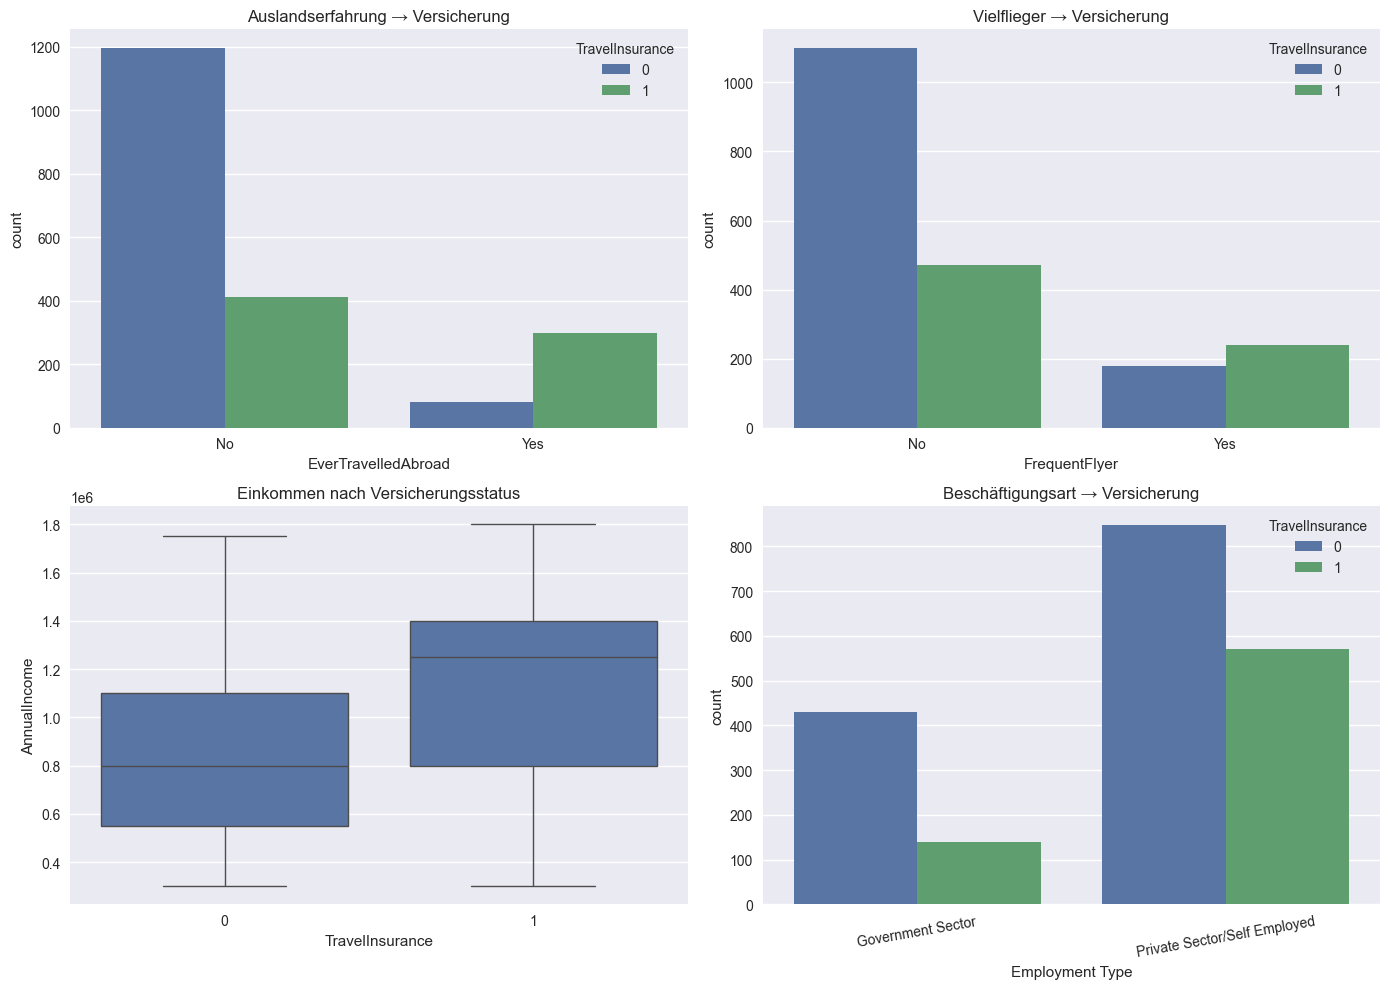

In [5]:
df.describe(include='all')  # 3a + 3c

# Bonus-Plot
fig, ax = plt.subplots(2,2, figsize=(14,10))
sns.countplot(data=df, x='EverTravelledAbroad', hue='TravelInsurance', ax=ax[0,0])
ax[0,0].set_title('Auslandserfahrung → Versicherung')
sns.countplot(data=df, x='FrequentFlyer', hue='TravelInsurance', ax=ax[0,1])
ax[0,1].set_title('Vielflieger → Versicherung')
sns.boxplot(data=df, x='TravelInsurance', y='AnnualIncome', ax=ax[1,0])
ax[1,0].set_title('Einkommen nach Versicherungsstatus')
sns.countplot(data=df, x='Employment Type', hue='TravelInsurance', ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=10)
ax[1,1].set_title('Beschäftigungsart → Versicherung')
plt.tight_layout()
plt.show()

### 3b – Erwartung vs Realität

Erwartet & bestätigt: Einkommen, Auslandserfahrung, Vielflieger
Überraschend: Chronische Krankheiten irrelevant, Government Sector kauft fast nie (nur 17%!)

### 3d – Mittelwert vs Median & Streuung

Age           : Mean 29.65 | Median 29 → symmetrisch, sehr geringe Streuung (Std=2.91)
AnnualIncome  : Mean 933k  | Median 900k → leicht rechtsschief
FamilyMembers : Mean 4.75  | Median 5 → leicht linksschief
TravelInsurance: 35.7% positiv → leicht unausgewogen, aber ok

### 3e – Gesamterkenntnisse

Der Datensatz zeigt klare sozioökonomische Muster: Wer reist, viel verdient und im Privatsektor arbeitet,
kauft fast immer eine Reiseversicherung. Gesundheit und Alter spielen fast keine Rolle.
Perfekter Datensatz für binäre Klassifikation!